In [21]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader

## Initialization of the dataset


In [10]:
import kagglehub

# Download the dataset
path = kagglehub.dataset_download('johnsmith88/heart-disease-dataset')
path

'/home/sexomq/.cache/kagglehub/datasets/johnsmith88/heart-disease-dataset/versions/2'

In [11]:
df = pd.read_csv(path + '/heart.csv')

In [12]:
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1020,59,1,1,140,221,0,1,164,1,0.0,2,0,2,1
1021,60,1,0,125,258,0,0,141,1,2.8,1,1,3,0
1022,47,1,0,110,275,0,0,118,1,1.0,1,1,2,0
1023,50,0,0,110,254,0,0,159,0,0.0,2,0,2,1


In [29]:
df.shape

(1025, 14)

In [13]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,1025.000000,1025.000000,1025.000000,1025.000000,1025.00000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000
mean,54.434146,0.695610,0.942439,131.611707,246.00000,0.149268,0.529756,149.114146,0.336585,1.071512,1.385366,0.754146,2.323902,0.513171
std,9.072290,0.460373,1.029641,17.516718,51.59251,0.356527,0.527878,23.005724,0.472772,1.175053,0.617755,1.030798,0.620660,0.500070
min,29.000000,0.000000,0.000000,94.000000,126.00000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.000000,0.000000,0.000000,120.000000,211.00000,0.000000,0.000000,132.000000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,56.000000,1.000000,1.000000,130.000000,240.00000,0.000000,1.000000,152.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,275.00000,0.000000,1.000000,166.000000,1.000000,1.800000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.00000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 112.2 KB


(array([499.,   0., 526.]),
 array([0.        , 0.33333333, 0.66666667, 1.        ]),
 <BarContainer object of 3 artists>)

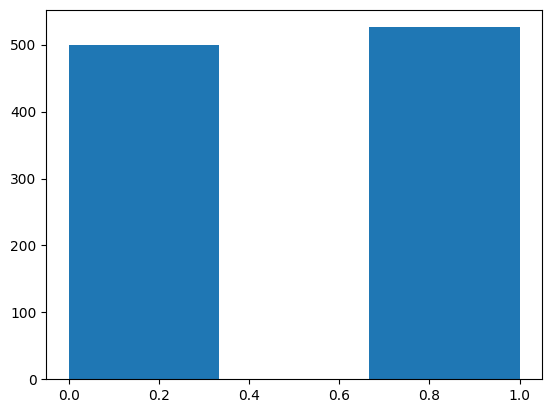

In [57]:
plt.hist(df['target'], bins=3)

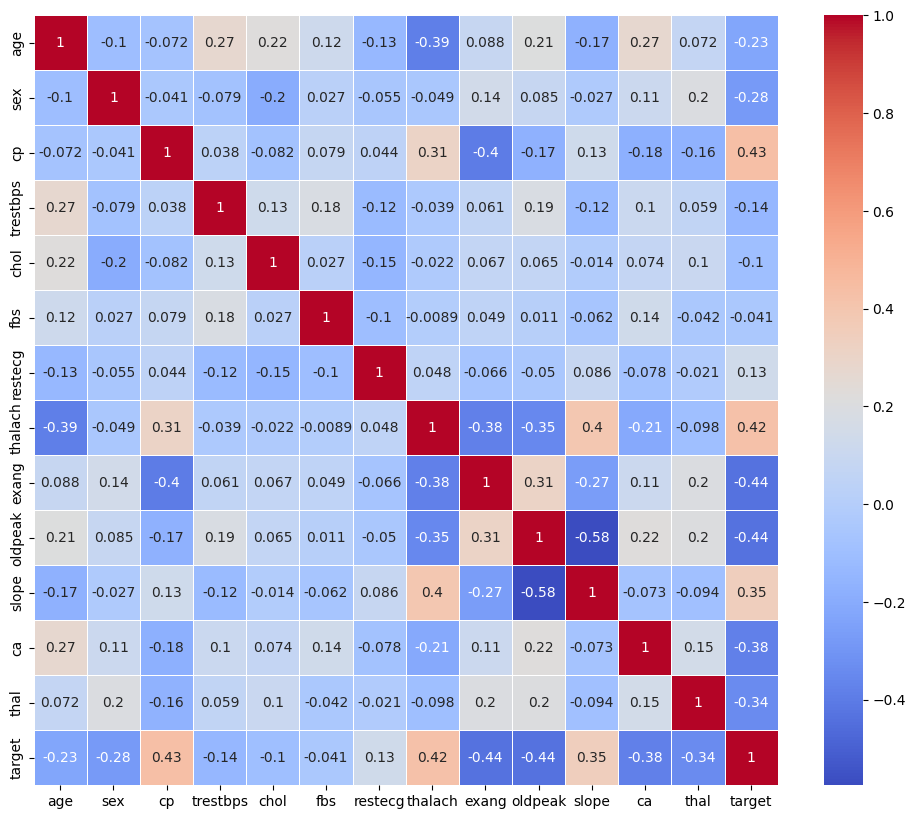

In [16]:
# Corelation matrix with seaborn
plt.figure(figsize=(12,10))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', linewidths=.5)
plt.show()

## Train-Test Split


In [19]:
# split
X_train, X_test, y_train, y_test = train_test_split(df.drop('target', axis=1), df['target'], test_size=0.2, random_state=42)

print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(820, 13) (205, 13) (820,) (205,)


In [23]:
class Dataset(torch.utils.data.Dataset):
    def __init__(self, X, y):
        self.X = torch.tensor(X.values, dtype=torch.float32)
        self.y = torch.tensor(y.values, dtype=torch.float32)        

    def __len__(self):
        return len(self.X)

    def __getitem__(self, idx):
        return self.X[idx], self.y[idx]

## DataLoaders


In [24]:
# Data Loaders
train_dataloader = DataLoader(Dataset(X_train, y_train), batch_size=32, shuffle=True)
test_dataloader = DataLoader(Dataset(X_test, y_test), batch_size=32, shuffle=False)

In [25]:
for X, y in train_dataloader:
    print(X.shape, y.shape)
    break

torch.Size([32, 13]) torch.Size([32])


## Model implementation

### The model is fully customizeble with custom number of nodes and custom activation function for classification tasks.


In [69]:
class Model(nn.Module):
    def __init__(self, input_size, layer1_size, layer2_size, output_size, activation_in='relu'):
        super(Model, self).__init__()
        self.activation_in = activation_in
        self.activation_out = 'sigmoid'

        self.fc1 = nn.Linear(input_size, layer1_size)
        if self.activation_in == 'relu':
            self.relu = nn.ReLU()
        if self.activation_in == 'tanh':
            self.tanh = nn.Tanh()
        self.fc2 = nn.Linear(layer1_size, layer2_size)
        if self.activation_in == 'relu':
            self.relu = nn.ReLU()
        if self.activation_in == 'tanh':
            self.tanh = nn.Tanh()
        self.fc3 = nn.Linear(layer2_size, output_size)   
        self.sigmoid = nn.Sigmoid()

    def forward(self, x):
        x = self.fc1(x)
        if self.activation_in == 'relu':
            x = self.relu(x)
        if self.activation_in == 'tanh':
            x = self.tanh(x)
        x = self.fc2(x)
        if self.activation_in == 'relu':
            x = self.relu(x)
        if self.activation_in == 'tanh':
            x = self.tanh(x)
        x = self.fc3(x)
        if self.activation_out == 'sigmoid':
            x = self.sigmoid(x)
        return x


In [70]:
def train(loss_fn, optimizer, model, dataloader, device):
    size = len(dataloader.dataset)
    model.train()

    avg_loss = 0
    avg_pred = 0

    for batch, (X, y) in enumerate(dataloader):
        X, y = X.to(device), y.to(device)

        # Compute prediction error
        pred = model(X)
        loss = loss_fn(pred, y.view(-1, 1))

        # Backpropagation
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        avg_loss += loss.item()
        avg_pred += (pred.round() == y.view(-1, 1)).sum().item()

        # if batch % 100 == 0:
        #     loss, current = loss.item(), batch * len(X)
        #     print(f"loss: {loss:>7f}  [{current:>5d}/{size:>5d}]")

    avg_loss /= size
    avg_pred /= size

    return avg_loss, avg_pred, model

def test(loss_fn, model, dataloader, device):
    size = len(dataloader.dataset)
    model.eval()

    test_loss, correct = 0, 0

    with torch.no_grad():
        for X, y in dataloader:
            X, y = X.to(device), y.to(device)

            pred = model(X)
            test_loss += loss_fn(pred, y.view(-1, 1)).item()
            correct += (pred.round() == y.view(-1, 1)).sum().item()

    test_loss /= size
    correct /= size

    return test_loss, correct

In [72]:
# Train the model
epochs = 800
learning_rate = 0.001
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
features = df.drop('target', axis=1).shape[1]
model_1 = Model(input_size=features, layer1_size=64, layer2_size=32, output_size=1, activation_in='relu').to(device)

loss_fn = nn.BCELoss()
optimizer = optim.Adam(model_1.parameters(), lr=learning_rate)

loss = []
pred = []
test_loss = []
test_pred = []

for epoch in range(epochs):
    # print(f"Epoch {epoch+1}\n-------------------------------")
    loss_, pred_, model_ = train(loss_fn=loss_fn, optimizer=optimizer, model=model_1, dataloader=train_dataloader, device=device)
    test_loss_, test_pred_ = test(loss_fn=loss_fn, model=model_1, dataloader=test_dataloader, device=device) 
    loss.append(loss_)
    pred.append(pred_)
    test_loss.append(test_loss_)
    test_pred.append(test_pred_)

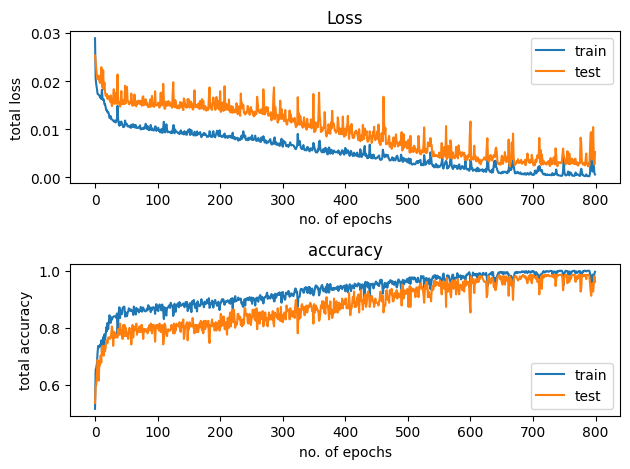

In [73]:

plt.subplot(2, 1, 1)
plt.plot(loss)
plt.plot(test_loss)
plt.xlabel("no. of epochs")
plt.ylabel("total loss")
plt.legend(["train", "test"])
plt.title("Loss")

plt.subplot(2, 1, 2)
plt.plot(pred)
plt.plot(test_pred)
plt.xlabel("no. of epochs")
plt.ylabel("total accuracy")
plt.legend(["train", "test"])
plt.title("accuracy")

plt.tight_layout()
plt.show()

## Hyperparameter tuning

### Used GridSearch for testing multiple parameters for the model


In [76]:
# Grid search

def grid_search(param_grid, X_train, y_train, X_test, y_test):
    results = []
    for params in param_grid:
        print(params)
        model = Model(input_size=params['input_size'], layer1_size=params['layer1_size'], layer2_size=params['layer2_size'], output_size=params['output_size'], activation_in=params['activation_in']).to(device)
        loss_fn = nn.BCELoss()
        optimizer = optim.Adam(model.parameters(), lr=params['learning_rate'])
        train_dataloader = DataLoader(Dataset(X_train, y_train), batch_size=params['batch_size'], shuffle=True)
        test_dataloader = DataLoader(Dataset(X_test, y_test), batch_size=params['batch_size'], shuffle=False)
        loss = []
        pred = []
        test_loss = []
        test_pred = []
        for epoch in range(params['epochs']):
            loss_, pred_, model_ = train(loss_fn=loss_fn, optimizer=optimizer, model=model, dataloader=train_dataloader, device=device)
            test_loss_, test_pred_ = test(loss_fn=loss_fn, model=model, dataloader=test_dataloader, device=device) 
            loss.append(loss_)
            pred.append(pred_)
            test_loss.append(test_loss_)
            test_pred.append(test_pred_)

        plt.subplot(2, 1, 1)
        plt.plot(loss)
        plt.plot(test_loss)
        plt.xlabel("no. of epochs")
        plt.ylabel("total loss")
        plt.legend(["train", "test"])
        plt.title("Loss")

        plt.subplot(2, 1, 2)
        plt.plot(pred)
        plt.plot(test_pred)
        plt.xlabel("no. of epochs")
        plt.ylabel("total accuracy")
        plt.legend(["train", "test"])
        plt.title("accuracy")

        plt.tight_layout()
        plt.show()
        
        results.append({
            'params': params,
            'loss': loss,
            'pred': pred,
            'test_loss': test_loss,
            'test_pred': test_pred
        })
    return results


In [77]:
def top_n_results(results, n=5):
    results = sorted(results, key=lambda x: x['test_pred'][-1], reverse=True)
    return results[:n]

In [81]:
from sklearn.model_selection import ParameterGrid

param_grid = {
    'input_size': [df.drop('target', axis=1).shape[1]],
    'layer1_size': [64],
    'layer2_size': [32],
    'output_size': [1],
    'activation_in': ['relu', 'tanh'],
    'learning_rate': [0.001, 0.01],
    'epochs': [200, 600, 800],
    'batch_size': [1, 32, df.shape[0]],
}

param_grid = list(ParameterGrid(param_grid))

print(len(param_grid))


36


{'activation_in': 'relu', 'batch_size': 1, 'epochs': 200, 'input_size': 13, 'layer1_size': 64, 'layer2_size': 32, 'learning_rate': 0.001, 'output_size': 1}


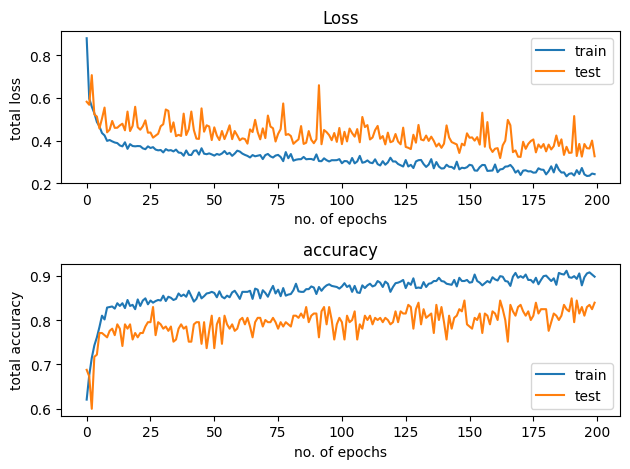

{'activation_in': 'relu', 'batch_size': 1, 'epochs': 200, 'input_size': 13, 'layer1_size': 64, 'layer2_size': 32, 'learning_rate': 0.01, 'output_size': 1}


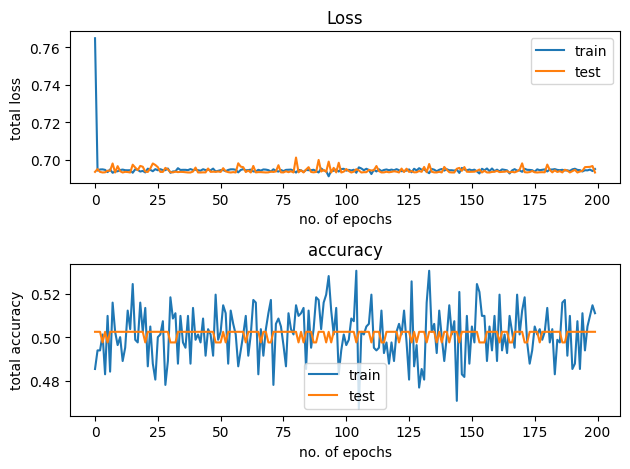

{'activation_in': 'relu', 'batch_size': 1, 'epochs': 600, 'input_size': 13, 'layer1_size': 64, 'layer2_size': 32, 'learning_rate': 0.001, 'output_size': 1}


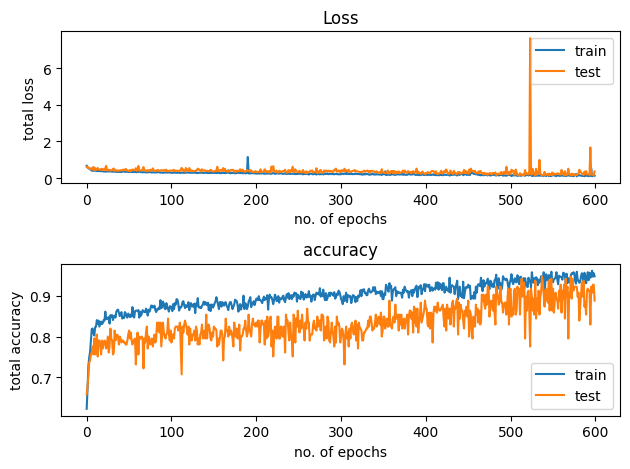

{'activation_in': 'relu', 'batch_size': 1, 'epochs': 600, 'input_size': 13, 'layer1_size': 64, 'layer2_size': 32, 'learning_rate': 0.01, 'output_size': 1}


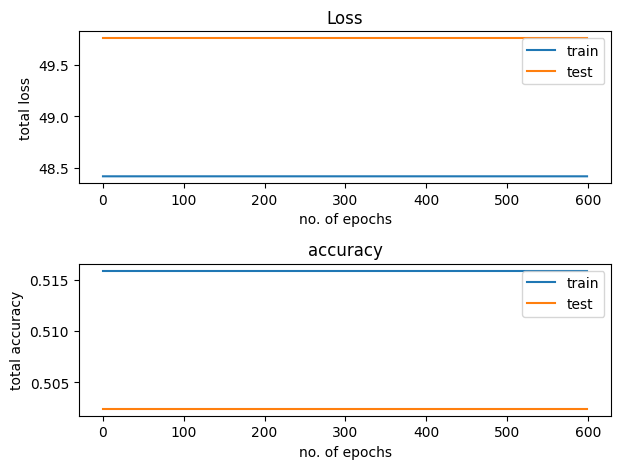

{'activation_in': 'relu', 'batch_size': 1, 'epochs': 800, 'input_size': 13, 'layer1_size': 64, 'layer2_size': 32, 'learning_rate': 0.001, 'output_size': 1}


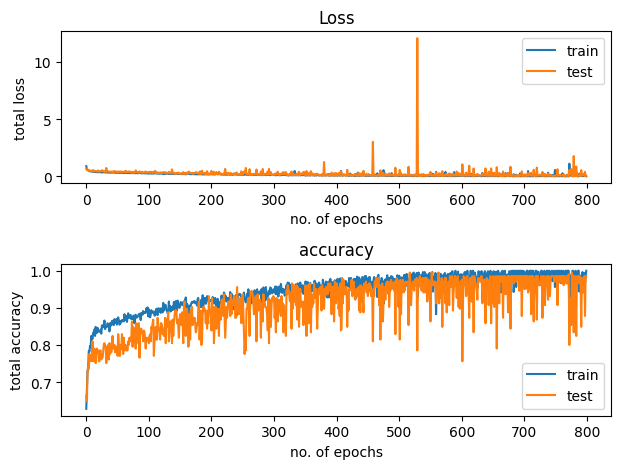

{'activation_in': 'relu', 'batch_size': 1, 'epochs': 800, 'input_size': 13, 'layer1_size': 64, 'layer2_size': 32, 'learning_rate': 0.01, 'output_size': 1}


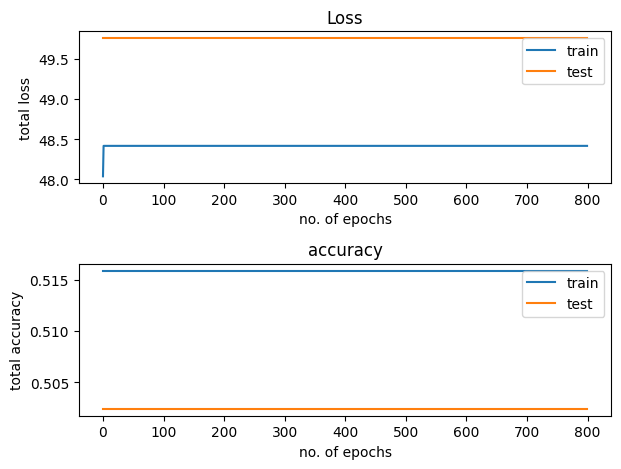

{'activation_in': 'relu', 'batch_size': 32, 'epochs': 200, 'input_size': 13, 'layer1_size': 64, 'layer2_size': 32, 'learning_rate': 0.001, 'output_size': 1}


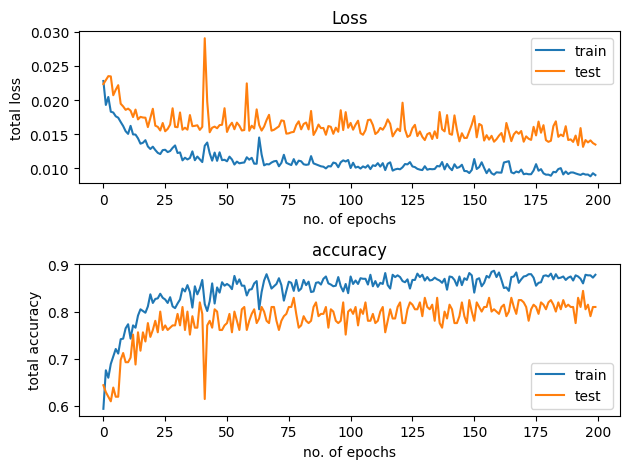

{'activation_in': 'relu', 'batch_size': 32, 'epochs': 200, 'input_size': 13, 'layer1_size': 64, 'layer2_size': 32, 'learning_rate': 0.01, 'output_size': 1}


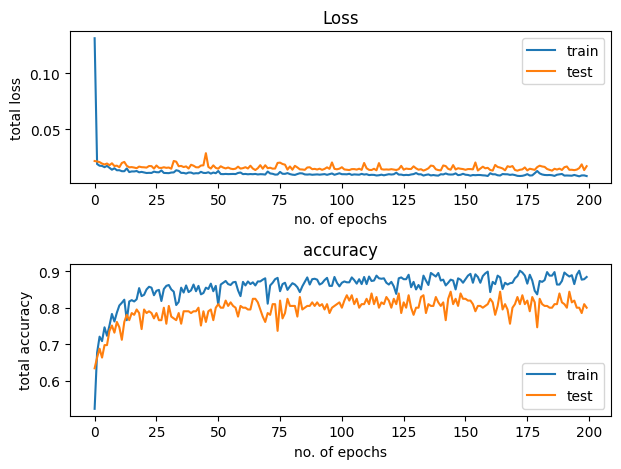

{'activation_in': 'relu', 'batch_size': 32, 'epochs': 600, 'input_size': 13, 'layer1_size': 64, 'layer2_size': 32, 'learning_rate': 0.001, 'output_size': 1}


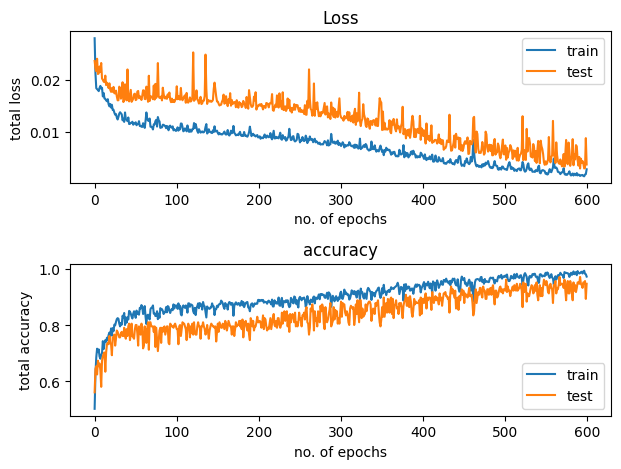

{'activation_in': 'relu', 'batch_size': 32, 'epochs': 600, 'input_size': 13, 'layer1_size': 64, 'layer2_size': 32, 'learning_rate': 0.01, 'output_size': 1}


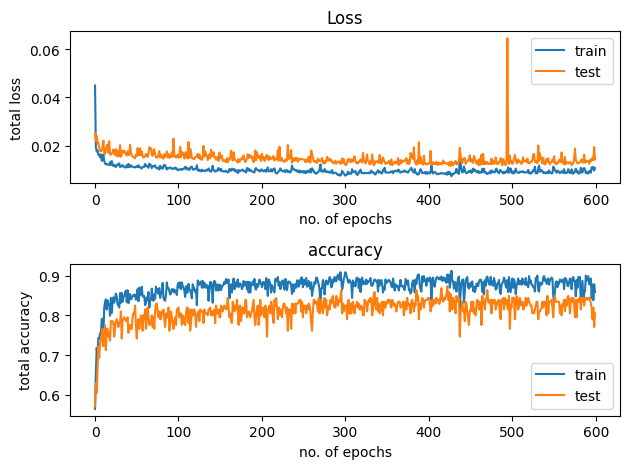

{'activation_in': 'relu', 'batch_size': 32, 'epochs': 800, 'input_size': 13, 'layer1_size': 64, 'layer2_size': 32, 'learning_rate': 0.001, 'output_size': 1}


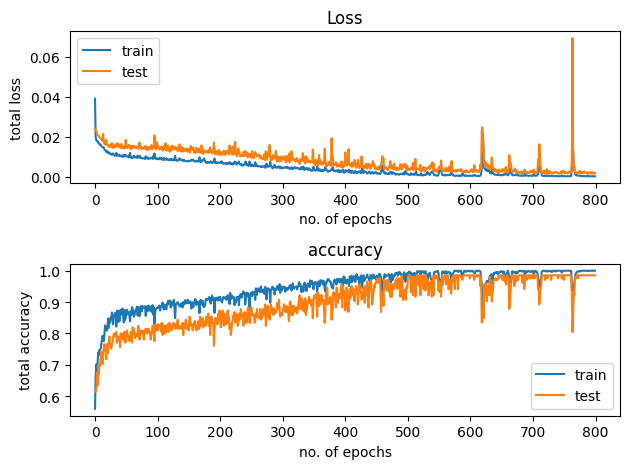

{'activation_in': 'relu', 'batch_size': 32, 'epochs': 800, 'input_size': 13, 'layer1_size': 64, 'layer2_size': 32, 'learning_rate': 0.01, 'output_size': 1}


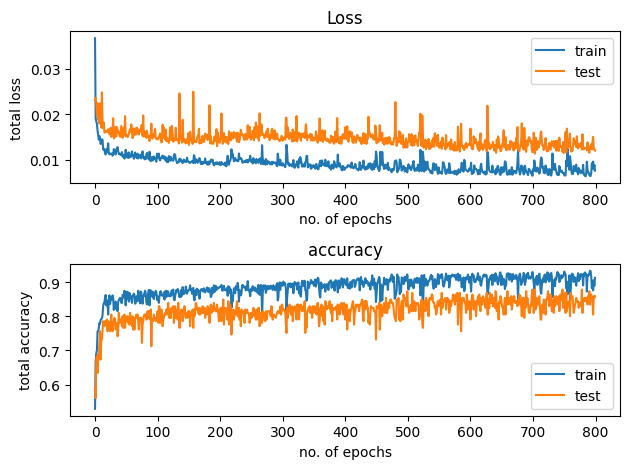

{'activation_in': 'relu', 'batch_size': 1025, 'epochs': 200, 'input_size': 13, 'layer1_size': 64, 'layer2_size': 32, 'learning_rate': 0.001, 'output_size': 1}


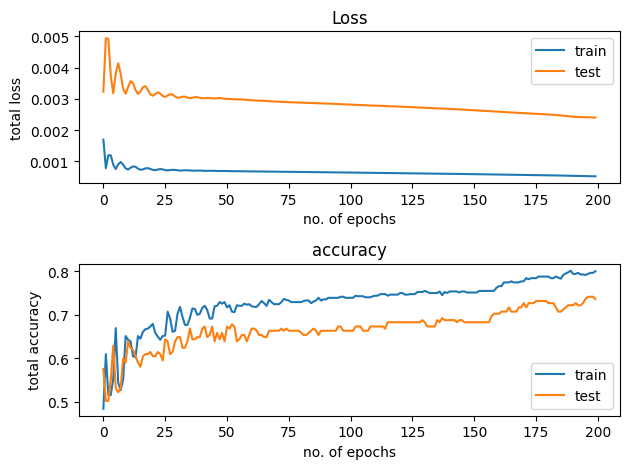

{'activation_in': 'relu', 'batch_size': 1025, 'epochs': 200, 'input_size': 13, 'layer1_size': 64, 'layer2_size': 32, 'learning_rate': 0.01, 'output_size': 1}


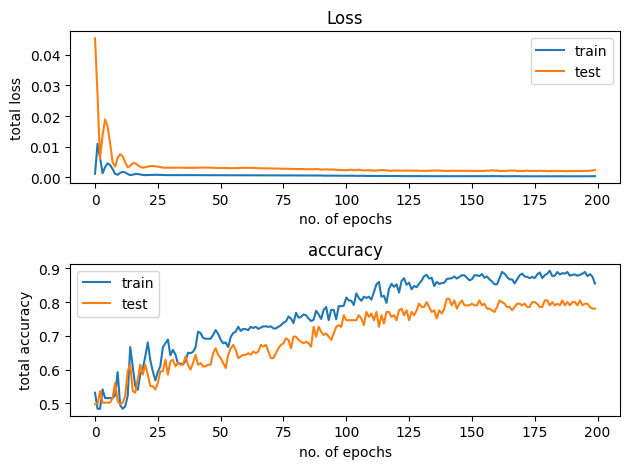

{'activation_in': 'relu', 'batch_size': 1025, 'epochs': 600, 'input_size': 13, 'layer1_size': 64, 'layer2_size': 32, 'learning_rate': 0.001, 'output_size': 1}


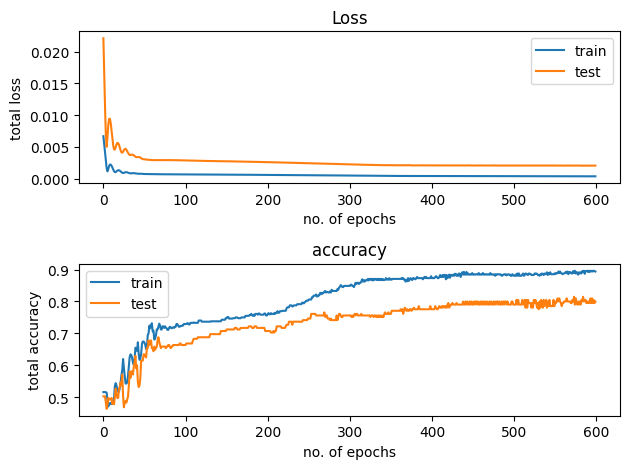

{'activation_in': 'relu', 'batch_size': 1025, 'epochs': 600, 'input_size': 13, 'layer1_size': 64, 'layer2_size': 32, 'learning_rate': 0.01, 'output_size': 1}


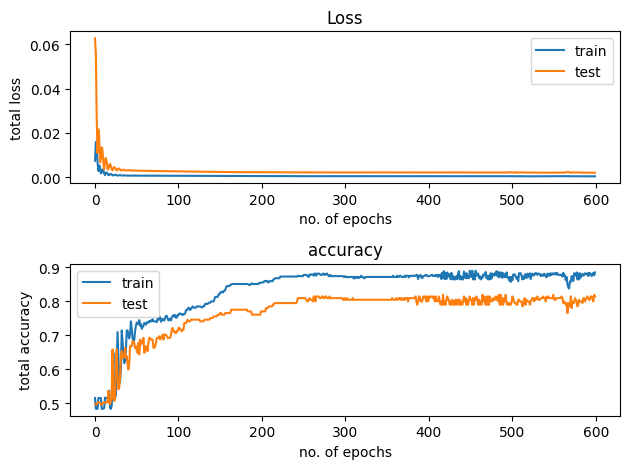

{'activation_in': 'relu', 'batch_size': 1025, 'epochs': 800, 'input_size': 13, 'layer1_size': 64, 'layer2_size': 32, 'learning_rate': 0.001, 'output_size': 1}


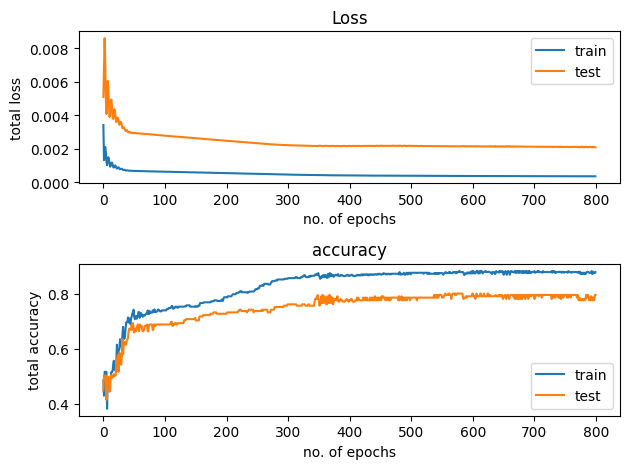

{'activation_in': 'relu', 'batch_size': 1025, 'epochs': 800, 'input_size': 13, 'layer1_size': 64, 'layer2_size': 32, 'learning_rate': 0.01, 'output_size': 1}


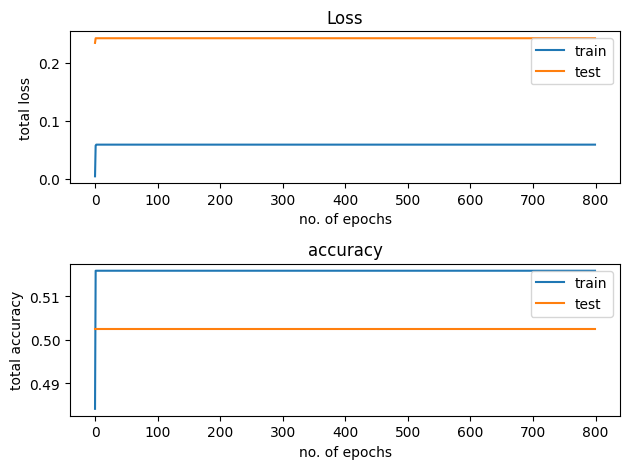

{'activation_in': 'tanh', 'batch_size': 1, 'epochs': 200, 'input_size': 13, 'layer1_size': 64, 'layer2_size': 32, 'learning_rate': 0.001, 'output_size': 1}


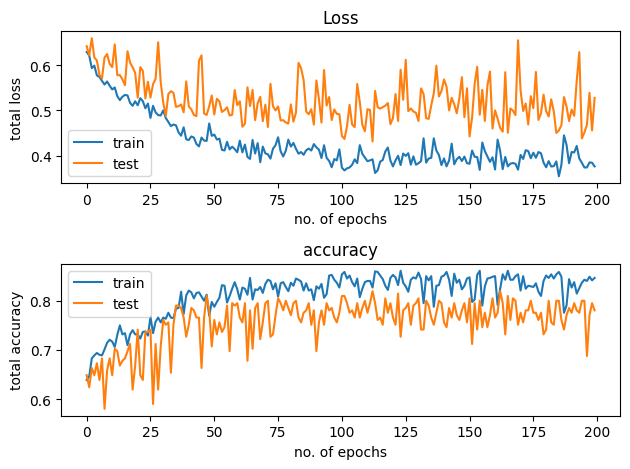

{'activation_in': 'tanh', 'batch_size': 1, 'epochs': 200, 'input_size': 13, 'layer1_size': 64, 'layer2_size': 32, 'learning_rate': 0.01, 'output_size': 1}


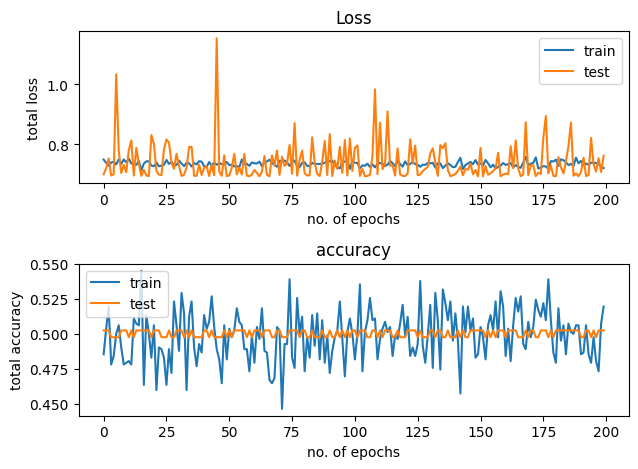

{'activation_in': 'tanh', 'batch_size': 1, 'epochs': 600, 'input_size': 13, 'layer1_size': 64, 'layer2_size': 32, 'learning_rate': 0.001, 'output_size': 1}


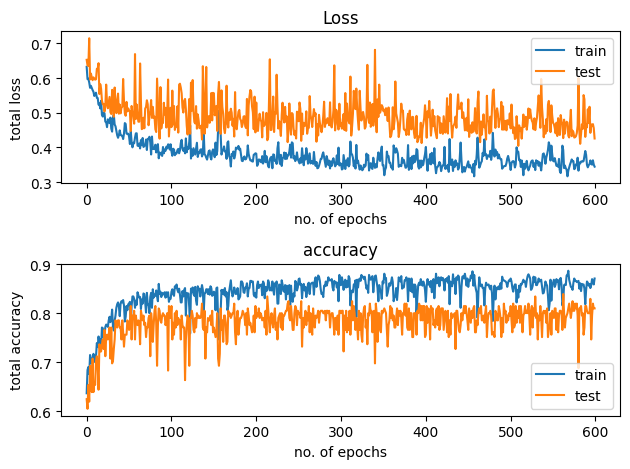

{'activation_in': 'tanh', 'batch_size': 1, 'epochs': 600, 'input_size': 13, 'layer1_size': 64, 'layer2_size': 32, 'learning_rate': 0.01, 'output_size': 1}


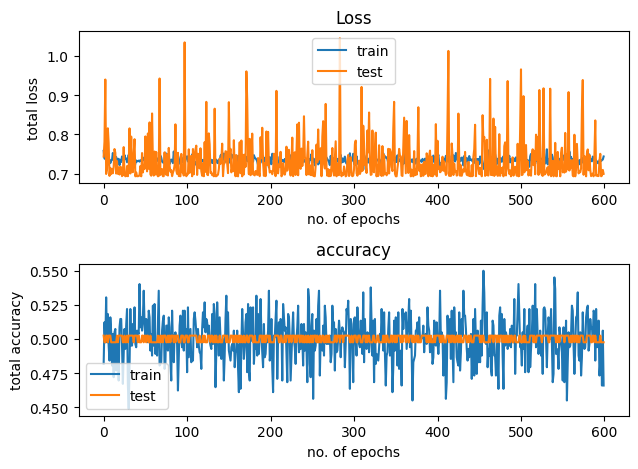

{'activation_in': 'tanh', 'batch_size': 1, 'epochs': 800, 'input_size': 13, 'layer1_size': 64, 'layer2_size': 32, 'learning_rate': 0.001, 'output_size': 1}


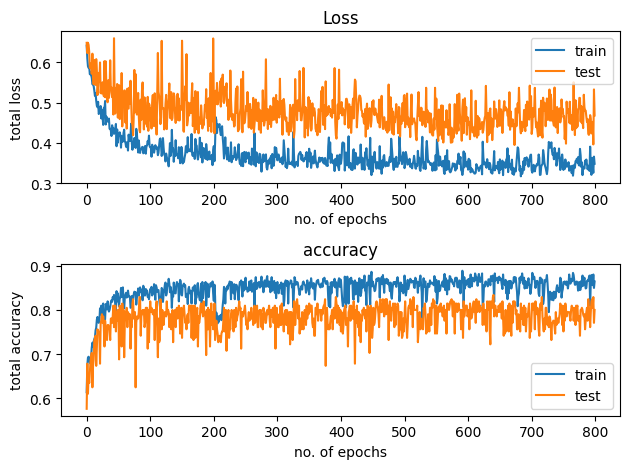

{'activation_in': 'tanh', 'batch_size': 1, 'epochs': 800, 'input_size': 13, 'layer1_size': 64, 'layer2_size': 32, 'learning_rate': 0.01, 'output_size': 1}


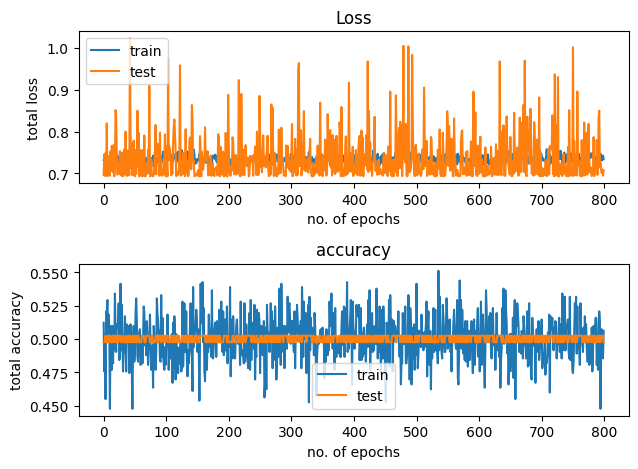

{'activation_in': 'tanh', 'batch_size': 32, 'epochs': 200, 'input_size': 13, 'layer1_size': 64, 'layer2_size': 32, 'learning_rate': 0.001, 'output_size': 1}


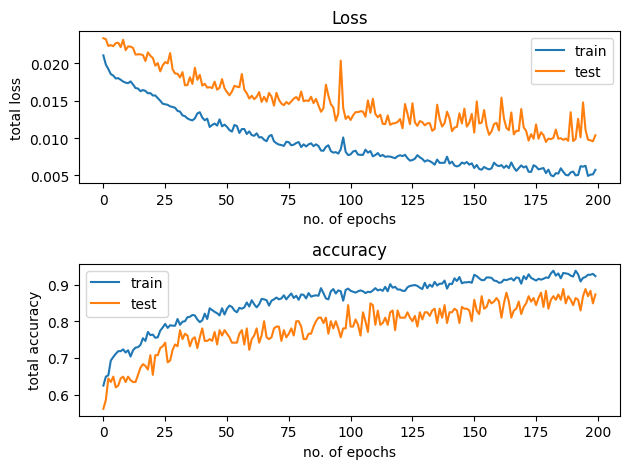

{'activation_in': 'tanh', 'batch_size': 32, 'epochs': 200, 'input_size': 13, 'layer1_size': 64, 'layer2_size': 32, 'learning_rate': 0.01, 'output_size': 1}


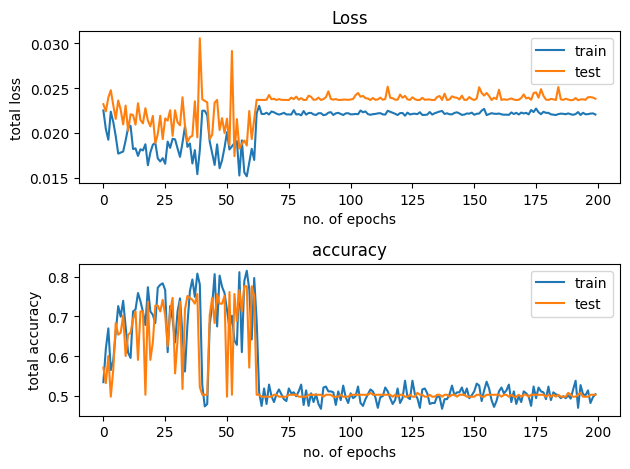

{'activation_in': 'tanh', 'batch_size': 32, 'epochs': 600, 'input_size': 13, 'layer1_size': 64, 'layer2_size': 32, 'learning_rate': 0.001, 'output_size': 1}


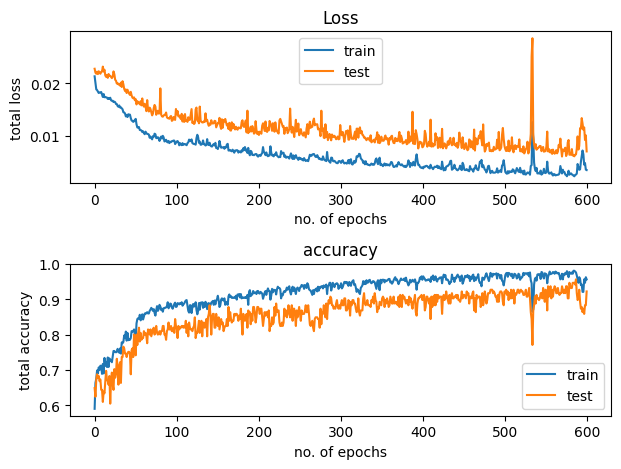

{'activation_in': 'tanh', 'batch_size': 32, 'epochs': 600, 'input_size': 13, 'layer1_size': 64, 'layer2_size': 32, 'learning_rate': 0.01, 'output_size': 1}


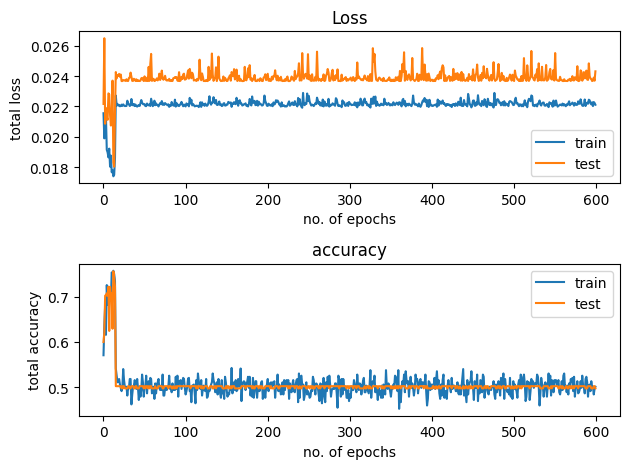

{'activation_in': 'tanh', 'batch_size': 32, 'epochs': 800, 'input_size': 13, 'layer1_size': 64, 'layer2_size': 32, 'learning_rate': 0.001, 'output_size': 1}


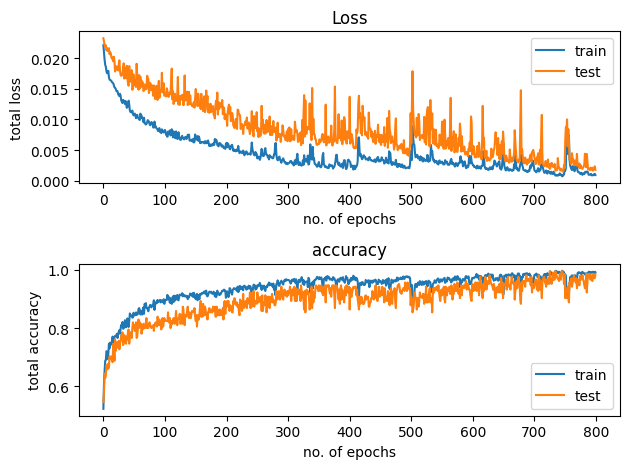

{'activation_in': 'tanh', 'batch_size': 32, 'epochs': 800, 'input_size': 13, 'layer1_size': 64, 'layer2_size': 32, 'learning_rate': 0.01, 'output_size': 1}


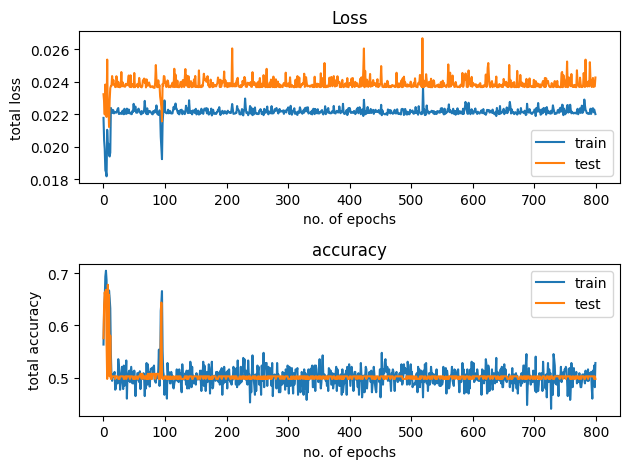

{'activation_in': 'tanh', 'batch_size': 1025, 'epochs': 200, 'input_size': 13, 'layer1_size': 64, 'layer2_size': 32, 'learning_rate': 0.001, 'output_size': 1}


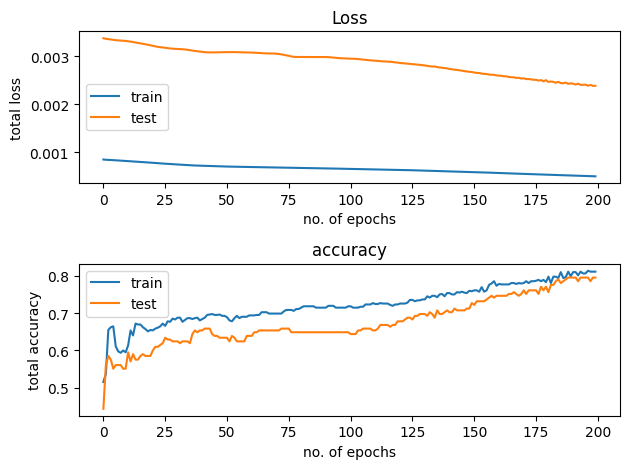

{'activation_in': 'tanh', 'batch_size': 1025, 'epochs': 200, 'input_size': 13, 'layer1_size': 64, 'layer2_size': 32, 'learning_rate': 0.01, 'output_size': 1}


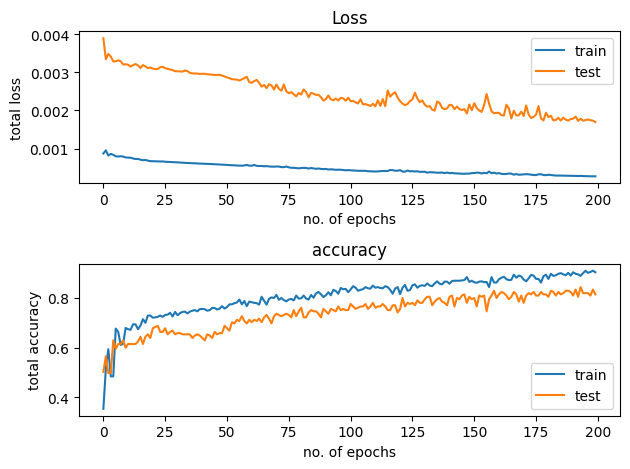

{'activation_in': 'tanh', 'batch_size': 1025, 'epochs': 600, 'input_size': 13, 'layer1_size': 64, 'layer2_size': 32, 'learning_rate': 0.001, 'output_size': 1}


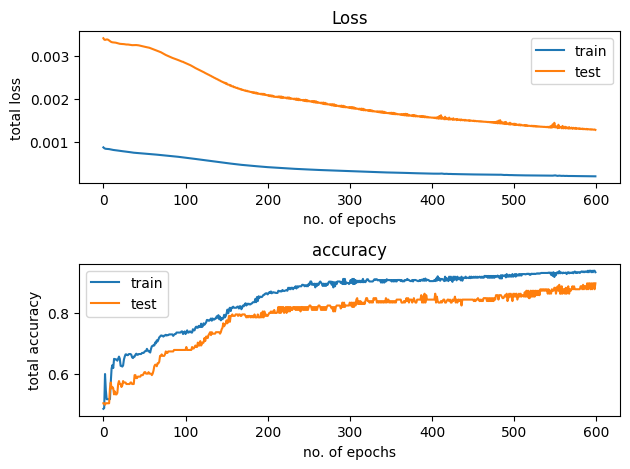

{'activation_in': 'tanh', 'batch_size': 1025, 'epochs': 600, 'input_size': 13, 'layer1_size': 64, 'layer2_size': 32, 'learning_rate': 0.01, 'output_size': 1}


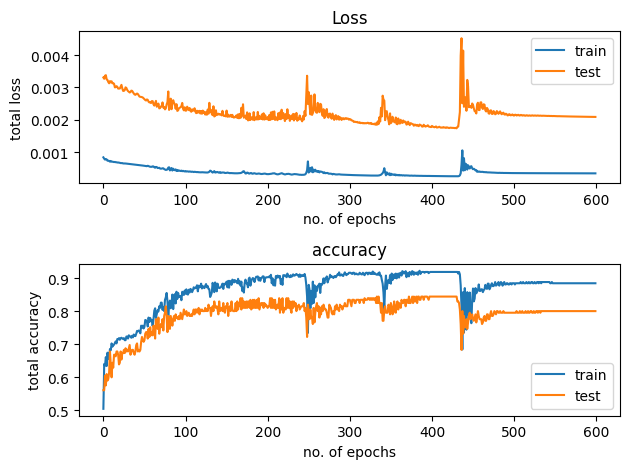

{'activation_in': 'tanh', 'batch_size': 1025, 'epochs': 800, 'input_size': 13, 'layer1_size': 64, 'layer2_size': 32, 'learning_rate': 0.001, 'output_size': 1}


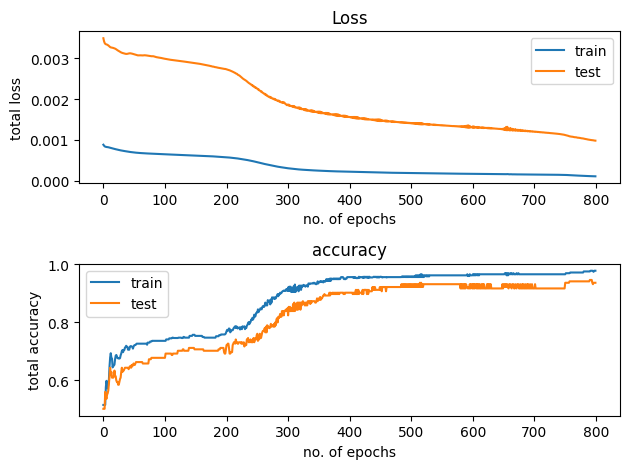

{'activation_in': 'tanh', 'batch_size': 1025, 'epochs': 800, 'input_size': 13, 'layer1_size': 64, 'layer2_size': 32, 'learning_rate': 0.01, 'output_size': 1}


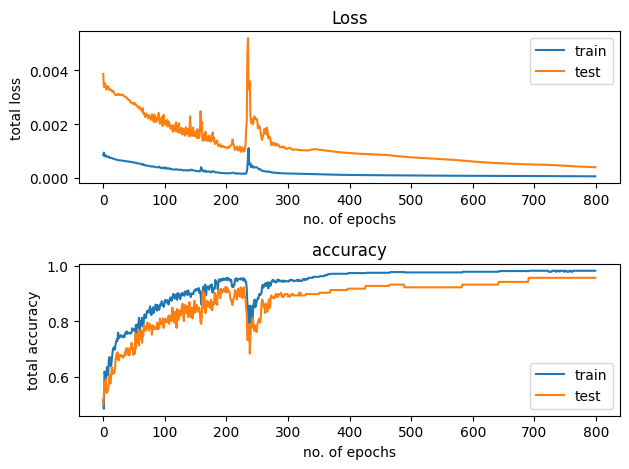

In [82]:
grid_search_results = grid_search(param_grid, X_train, y_train, X_test, y_test)

In [83]:
# Top 5 results
top_results = top_n_results(grid_search_results, n=5)

In [88]:
from pprint import pprint
for res in top_results:
    pprint(res["params"])

{'activation_in': 'relu',
 'batch_size': 1,
 'epochs': 800,
 'input_size': 13,
 'layer1_size': 64,
 'layer2_size': 32,
 'learning_rate': 0.001,
 'output_size': 1}
{'activation_in': 'relu',
 'batch_size': 32,
 'epochs': 800,
 'input_size': 13,
 'layer1_size': 64,
 'layer2_size': 32,
 'learning_rate': 0.001,
 'output_size': 1}
{'activation_in': 'tanh',
 'batch_size': 32,
 'epochs': 800,
 'input_size': 13,
 'layer1_size': 64,
 'layer2_size': 32,
 'learning_rate': 0.001,
 'output_size': 1}
{'activation_in': 'tanh',
 'batch_size': 1025,
 'epochs': 800,
 'input_size': 13,
 'layer1_size': 64,
 'layer2_size': 32,
 'learning_rate': 0.01,
 'output_size': 1}
{'activation_in': 'relu',
 'batch_size': 32,
 'epochs': 600,
 'input_size': 13,
 'layer1_size': 64,
 'layer2_size': 32,
 'learning_rate': 0.001,
 'output_size': 1}


## Conclusion

I did all the steps from the previous homework, adding a new step called hyperparameter tuning. After choosing some parameters and running the code for 1.5 hours, I understood that the parameters I have chosen in the begining were the best:

    {'activation_in': 'relu',

    'batch_size': 1,

    'epochs': 800,

    'input_size': 13,

    'layer1_size': 64,

    'layer2_size': 32,

    'learning_rate': 0.001,

    'output_size': 1}

Interesting lab and ThankYOU Vova for a clean Dataset!

With <3 by Tudor Sclifos!
